# 1. 문제정의(데이터 다루기)
- 목표 : 비만을 판단하는 모델 만들기

# 2. 데이터 수집

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bmi = pd.read_csv('bmi_500.csv', encoding = 'cp949', index_col = 'Label')

In [3]:
bmi.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [4]:
bmi.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [5]:
bmi.loc['Overweight']

,Gender,Height,Weight
Label,,,
Overweight,Female,195,104
Overweight,Male,149,61
Overweight,Male,189,104
Overweight,Male,174,90
Overweight,Female,192,101
...,...,...,...
Overweight,Female,149,61
Overweight,Female,195,104
Overweight,Female,188,99


In [6]:
bmi.loc['Obesity']

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Obesity,Female,185,110
Obesity,Female,169,103
Obesity,Female,159,80
Obesity,Female,169,97
...,...,...,...
Obesity,Male,146,85
Obesity,Female,188,115
Obesity,Male,173,111


# 3. 데이터 전처리

In [7]:
# 전체 데이터 수, 결축치 여부, 컬럼별 정보
bmi.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [8]:
#통계값 확인, 이상치 여부 확인해야하는데 지나치게 다른 값에 비해 큰 값이 있다면 이상치가 있다고 보면 됨
# 숫자인 값만 출력함 따라서 여기선 성별은 숫자 값이 아니므로 확인되지 않음
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 4. 탐색적 데이터 분석  - 시각화

In [9]:
# unique : 중복을 제거하고 하나의 값만 출력
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

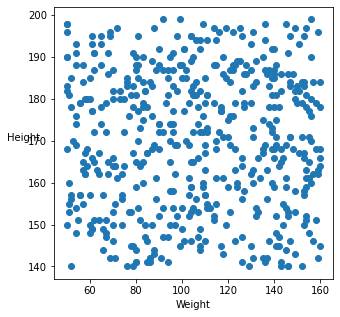

In [10]:
plt.figure(figsize = (5,5)) #가로, 세로 크기
plt.scatter(bmi.loc[:, 'Weight'], #scatter는 산점도를 표현하고 첫번째는 가로 
           bmi.loc[:,"Height"]) #두번째는 세로를 나타내줌
plt.xlabel('Weight')
plt.ylabel('Height', rotation = 0)
plt.show() #그래프 출력하기

In [11]:
def myScatter(label, color):
    tmp = bmi.loc[label]
    plt.scatter(tmp["Weight"],
               tmp["Height"],
               c = color,
               label = label)

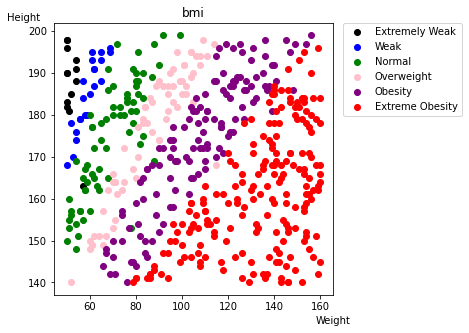

In [12]:
#그래프 크기 지정
plt.figure(figsize=(5,5))

# 클래스별로 다른 색으로 점찍기(산점도 그리기)
myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')

# 클래스별로 라벨 달아주기
plt.legend(loc = "upper right", bbox_to_anchor = (1.48,1.02))

# 축에 이름달기
plt.xlabel('Weight', position =(1,0))
plt.ylabel('Height', rotation = 0, position = (1,1))
plt.title('bmi')
plt.show()

In [13]:
nor = bmi.loc['Normal']

In [14]:
obe = bmi.loc['Obesity']

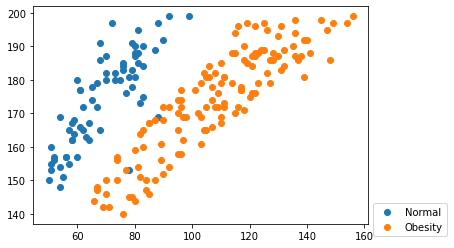

In [15]:
plt.scatter(x = nor['Weight'], y = nor['Height'], label = 'Normal')
plt.scatter(x = obe['Weight'], y = obe['Height'], label = 'Obesity')

plt.legend(bbox_to_anchor = (1.25,0.12))
plt.show()

# 5. 모델 선택 및 하이퍼파라미터 조정 (모델 다루기)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [17]:
knn_model1 = KNeighborsClassifier(n_neighbors=23)

#  6. 학습

In [18]:
# 데이터를 문제와 정답
#tranin과 test
data = pd.read_csv('bmi_500.csv')
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [19]:
X = data.loc[ : , 'Height' : 'Weight']
y = data.loc[ : , 'Label']

In [20]:
X.shape, y.shape

((500, 2), (500,))

In [21]:
# loc[행, 열] 이상:이하
#iloc[행, 열] 이상:미만
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [34]:
#학습 : fit
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

# 7. 평가 

In [25]:
# 예측 : predict
# 평가 : score
knn_model.predict(X_test)

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme

In [26]:
# X_test를 통해서 예측값을 뽑아냄
# y_test(실제 정답)를 통해서 예측값과 실제 정답을 비교해서
# 얼마나 맞췄는지를 나타냄
knn_model.score(X_test, y_test)

0.9066666666666666

In [27]:
knn_model1.score(X_test, y_test)

0.8533333333333334

In [28]:
# 개별 데이터 구하기
knn_model.predict([[173,74.93750]])

array(['Normal'], dtype=object)

In [29]:
for i in range (1,350):
    knn_model1 = KNeighborsClassifier(n_neighbors=i)
    knn_model1.fit(X_train, y_train)
    result = knn_model1.score(X_test, y_test)
    print('{}번 {}'.format(i, result))

1번 0.8866666666666667
2번 0.8933333333333333
3번 0.8933333333333333
4번 0.8933333333333333
5번 0.9066666666666666
6번 0.92
7번 0.9
8번 0.9066666666666666
9번 0.9133333333333333
10번 0.9333333333333333
11번 0.8866666666666667
12번 0.9133333333333333
13번 0.9133333333333333
14번 0.8933333333333333
15번 0.8866666666666667
16번 0.8933333333333333
17번 0.8933333333333333
18번 0.8933333333333333
19번 0.86
20번 0.8666666666666667
21번 0.8533333333333334
22번 0.8533333333333334
23번 0.8533333333333334
24번 0.8466666666666667
25번 0.8466666666666667
26번 0.8466666666666667
27번 0.8533333333333334
28번 0.84
29번 0.84
30번 0.8333333333333334
31번 0.84
32번 0.84
33번 0.8333333333333334
34번 0.8333333333333334
35번 0.84
36번 0.84
37번 0.8333333333333334
38번 0.8333333333333334
39번 0.8333333333333334
40번 0.82
41번 0.8266666666666667
42번 0.8266666666666667
43번 0.8266666666666667
44번 0.8133333333333334
45번 0.8066666666666666
46번 0.8066666666666666
47번 0.8066666666666666
48번 0.8066666666666666
49번 0.8066666666666666
50번 0.8133333333333334
